# Finding the Interest Level of Rental Listings

## Goal of our project is develop a model  to categorize rental listings in such a way that end user don’t need to spend time in finding the highly interested advertisements with a good F1 score and this F1 score should be greater than our benchmark model.

### 1) In this project, we start with data analysis using the pandas , numpy 
### 2) Later, we apply K-Means on latitude and longitude to get Geographical clusters
### 3) Apply NLP on description and ontain some key features
### 4) Apply Multi-Class classification algorithms  and use F1 score to evalaute the model

In [1]:
#import pandas and numpy
import pandas as pd
import numpy as np

#### Convert training json file data into dataframe

In [2]:
df=pd.read_json("C:\\Users\\venkata_kalluri\\Desktop\\twosigma\\train.json\\train.json")

#### Reset the index

In [3]:
df=df.reset_index()

#### Describe the training data

In [4]:
df.describe()

,index,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.000000,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,62063.319724,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,35784.341886,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,4.000000,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,31105.750000,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,62033.500000,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,93011.750000,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,124009.000000,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


#### Display the top 5 rows of data

In [5]:
df.head()

,index,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
1,10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
2,100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
3,100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
4,100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


#### List of columns

In [6]:
list(df)

['index',
 u'bathrooms',
 u'bedrooms',
 u'building_id',
 u'created',
 u'description',
 u'display_address',
 u'features',
 u'interest_level',
 u'latitude',
 u'listing_id',
 u'longitude',
 u'manager_id',
 u'photos',
 u'price',
 u'street_address']

#### Extract the 'features' column from the data and make it intoa dataframe¶

In [7]:
dfeature=pd.DataFrame(df['features'])
dfeature.head()

,features
0,[]
1,"[Doorman, Elevator, Fitness Center, Cats Allow..."
2,"[Laundry In Building, Dishwasher, Hardwood Flo..."
3,"[Hardwood Floors, No Fee]"
4,[Pre-War]


#### In features dataframe every row contains a list of features, now let's merge all these lists into a big list

In [8]:
features_list=[]
for col,col_data in dfeature.iteritems():
    for x in col_data:
         for ac in x:
            features_list.append(ac) 
len(features_list)

267906

#### Get the top ten most frequently occured features

In [9]:
from collections import Counter
c = Counter(features_list)
commonFeatures=c.most_common(10)
commonFeatures

[(u'Elevator', 25915),
 (u'Cats Allowed', 23540),
 (u'Hardwood Floors', 23527),
 (u'Dogs Allowed', 22035),
 (u'Doorman', 20898),
 (u'Dishwasher', 20426),
 (u'No Fee', 18062),
 (u'Laundry in Building', 16344),
 (u'Fitness Center', 13252),
 (u'Pre-War', 9148)]

#### Convert these top 10 features into a list

In [10]:
topFeatures=[]
for k in commonFeatures:
    topFeatures.append(k[0])
topFeatures

[u'Elevator',
 u'Cats Allowed',
 u'Hardwood Floors',
 u'Dogs Allowed',
 u'Doorman',
 u'Dishwasher',
 u'No Fee',
 u'Laundry in Building',
 u'Fitness Center',
 u'Pre-War']

#### Create a pandas dataframe with topFeatures as columns

In [11]:
dFeatures_table=pd.DataFrame(columns=topFeatures)
dFeatures_table

,Elevator,Cats Allowed,Hardwood Floors,Dogs Allowed,Doorman,Dishwasher,No Fee,Laundry in Building,Fitness Center,Pre-War


#### Now add values to this dFeatures_table dataframe, if you find any top 10 features in the row (list) of dfeature dataframe, add 1 to the corresponding column feature else add 0

In [12]:
for col,col_data in dfeature.iteritems():
    for x in col_data:
        ls=[0,0,0,0,0,0,0,0,0,0]
        for ac in x:
            if ac=='Elevator':
                ls[0]=1
            elif ac=='Cats Allowed':
                ls[1]=1
            elif ac=='Hardwood Floors':
                ls[2]=1
            elif ac=='Dogs Allowed':
                ls[3]=1
            elif ac=='Doorman':
                ls[4]=1
            elif ac=='Dishwasher':
                ls[5]=1
            elif ac=='No Fee':
                ls[6]=1
            elif ac=='Laundry in Building':
                ls[7]=1
            elif ac=='Fitness Center':
                ls[8]=1
            elif ac=='Pre-War':
                ls[9]=1

            
                
        tempDF=pd.DataFrame(np.array([[ls[0],ls[1],ls[2],ls[3],ls[4],ls[5],ls[6],ls[7],ls[8],ls[9]]]),columns=topFeatures)
        dFeatures_table=pd.concat([dFeatures_table,tempDF],ignore_index=True)
                

#### Display the dFeatures_table after adding the values

In [13]:
dFeatures_table.tail()

,Elevator,Cats Allowed,Hardwood Floors,Dogs Allowed,Doorman,Dishwasher,No Fee,Laundry in Building,Fitness Center,Pre-War
49347,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
49348,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
49349,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
49350,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
49351,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Now let's view at the decription and take the best 5 features which can change the interest level using our domain knowledge

In [14]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [15]:
dDesc=pd.DataFrame(df['description'])
dDesc.head()

,description
0,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
1,
2,"Top Top West Village location, beautiful Pre-w..."
3,Building Amenities - Garage - Garden - fitness...
4,Beautifully renovated 3 bedroom flex 4 bedroom...


In [16]:
act_data=''
for col,col_data in dDesc.iteritems():
    for x in col_data:
        act_data+=x

In [17]:
import re
act_data = re.compile(r'<.*?>').sub('', act_data)

In [18]:
from nltk.stem.lancaster import LancasterStemmer as ls


In [19]:
custStopWords=set(stopwords.words('english')+list(punctuation))

In [20]:
wordlist=[]
for word in word_tokenize(act_data):
    if len(word)<3:
        continue;
    elif word in custStopWords:
        continue;
    else:
        wordlist.append(word.encode('utf8'))
#ls().stem(word)

In [21]:
from collections import Counter
c = Counter(wordlist)
commonFeatures=c.most_common(70)
commonFeatures

[('kagglemanager', 12000),
 ('apartment', 9119),
 ('New', 8299),
 ('York', 7237),
 ('building', 7125),
 ('kitchen', 6044),
 ('AND', 5834),
 ('real', 5671),
 ('broker', 5631),
 ('The', 5571),
 ('estate', 5566),
 ('housing', 5405),
 ('equal', 5378),
 ('supports', 5344),
 ('renthop.com', 5249),
 ('room', 4966),
 ('email', 4730),
 ('bedroom', 4658),
 ('THE', 4353),
 ('appliances', 4207),
 ('space', 4081),
 ('floors', 4024),
 ('WITH', 3969),
 ('This', 3773),
 ('contact', 3716),
 ('call', 3624),
 ('steel', 3622),
 ('features', 3560),
 ('viewing', 3492),
 ('living', 3403),
 ('new', 3367),
 ('stainless', 3365),
 ('FOR', 3329),
 ('restaurants', 3326),
 ('private', 3270),
 ('unit', 3157),
 ('hardwood', 3112),
 ('windows', 3094),
 ('information', 3075),
 ('great', 3050),
 ('Park', 2831),
 ('schedule', 2761),
 ('renovated', 2721),
 ('large', 2695),
 ('laundry', 2651),
 ('FEE', 2612),
 ('located', 2563),
 ('marble', 2560),
 ('bathroom', 2547),
 ('one', 2506),
 ('area', 2494),
 ('view', 2474),
 ('gr

In [22]:
topLabels=['new','park','renovated','pool','loft','restaurants','marble']
dDescribe_table=pd.DataFrame(columns=topLabels)
dDescribe_table

,new,park,renovated,pool,loft,restaurants,marble


In [23]:
for col,col_data in dDesc.iteritems():
    for x in col_data:
        ls=[0,0,0,0,0,0,0]
        if 'new' in x:
            ls[0]=1

        if 'park' in x or 'Park' in x:
            ls[1]=1

        if 'renovated' in x or 'Renovated' in x:
             ls[2]=1

        if 'pool' in x or 'SwimmingPool' in x:
             ls[3]=1

        if 'loft' in x or 'Loft' in x:
             ls[4]=1
                
        if 'restaurants' in x or 'Restaurants' in x:
             ls[5]=1
                
        if 'marble' in x or 'Marble' in x:
             ls[6]=1

            
        tempDF=pd.DataFrame(np.array([[ls[0],ls[1],ls[2],ls[3],ls[4],ls[5],ls[6]]]),columns=topLabels)
        dDescribe_table=pd.concat([dDescribe_table,tempDF],ignore_index=True)

In [24]:
dDescribe_table.head()

,new,park,renovated,pool,loft,restaurants,marble
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Concat this description dataframe with the features dataframe

In [25]:
dFeatures_table = pd.concat([dFeatures_table,dDescribe_table], axis=1, join_axes=[dFeatures_table.index])
dFeatures_table.head()

,Elevator,Cats Allowed,Hardwood Floors,Dogs Allowed,Doorman,Dishwasher,No Fee,Laundry in Building,Fitness Center,Pre-War,new,park,renovated,pool,loft,restaurants,marble
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Concat this features+description table with our actual main dataframe

In [26]:
resFrame = pd.concat([df, dFeatures_table], axis=1, join_axes=[df.index])
resFrame.tail()

,index,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,...,Laundry in Building,Fitness Center,Pre-War,new,park,renovated,pool,loft,restaurants,marble
49347,9999,1.0,2,297160caf8a88c10718b492d4672c6b4,2016-06-02 05:41:05,"30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...",E 30 St,"[Elevator, Laundry in Building, Laundry in Uni...",medium,40.7426,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
49348,99991,1.0,1,9e871ccfea7b07686c101548ca693af6,2016-04-04 18:22:34,"HIGH END condo finishes, swimming pool, and ki...",Rector Pl,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",low,40.7102,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
49349,99992,1.0,1,7967a1280bf3f7644500fc79d2696b0e,2016-04-16 02:13:40,Large Renovated One Bedroom Apartment with Sta...,West 45th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7601,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
49350,99993,1.0,0,ad67f6181a49bde19218929b401b31b7,2016-04-08 02:13:33,Stylishly sleek studio apartment with unsurpas...,Wall Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7066,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49351,99994,1.0,2,5173052db6efc0caaa4d817112a70f32,2016-04-12 02:48:07,Look no further!!! This giant 2 bedroom apart...,Park Terrace East,[Hardwood Floors],low,40.8699,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Convert the labeled Y column (target column) into numerical  

In [27]:
interestFrame=resFrame['interest_level']
yList=[]
for col,col_data in interestFrame.iteritems():
    if col_data=='low':
        yList.append(0)
    elif col_data=='medium':
        yList.append(1)
    elif col_data=='high':
        yList.append(2)
YFrame=pd.DataFrame(yList,columns=['interest_level'])
YFrame.head()

,interest_level
0,1
1,0
2,2
3,0
4,0


#### Let's apply K-Means on longitude and latitude, and the result will be gepgraphical clusters
#### Create a dataframe by taking logitutde and latitude from the resFrame which we formed in previous step

In [28]:
areaFrame=resFrame[['latitude','longitude']]
areaFrame.head()

,latitude,longitude
0,40.7145,-73.9425
1,40.7947,-73.9667
2,40.7388,-74.0018
3,40.7539,-73.9677
4,40.8241,-73.9493


In [29]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(areaFrame)
areaLabels=kmeans.labels_
areaLabels

array([0, 0, 0, ..., 0, 0, 0])

#### Now make a dataframe using these clusters, areaFrame is contains clusters of longitude and latitude.
#### Make a dataframe by conacting longitude ,latitude & areaFrame , so that we can use it for visualzation

In [30]:
areaFrame=pd.DataFrame(areaLabels,columns=['areaCost'])

geoRes = pd.concat([resFrame[['latitude','longitude']], areaFrame], axis=1, join_axes=[areaFrame.index])

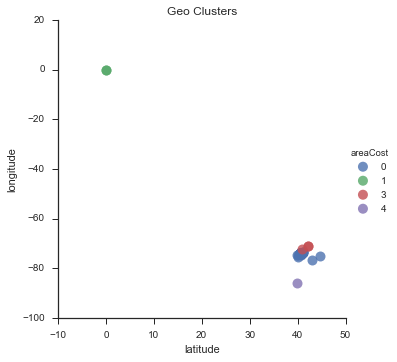

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("ticks")


sns.lmplot('latitude', 'longitude', 
           data=geoRes.head(15000), 
           fit_reg=False, 
           hue="areaCost",  
           scatter_kws={"s": 100})
plt.title('Geo Clusters')
plt.xlabel('latitude')
plt.ylabel('longitude')

In [32]:
clusterLabels=['clus_0','clus_1','clus_2','clus_3','clus_4']
clusFrame=pd.DataFrame(columns=clusterLabels)
clusFrame

,clus_0,clus_1,clus_2,clus_3,clus_4


In [33]:
for col,col_data in areaFrame.iteritems():
    for x in col_data:
        ls=[0,0,0,0,0]
        #print x
        if x==0:
            ls[0]=1
        elif x==1:
            ls[1]=1
        elif x==2:
            ls[2]=1
        elif x==3:
            ls[3]=1
        elif x==4:
            ls[4]=1
        elif x==5:
            ls[5]=1
        elif x==6:
            ls[6]=1
        elif x==7:
            ls[7]

            
        tempDF=pd.DataFrame(np.array([[ls[0],ls[1],ls[2],ls[3],ls[4]]]),columns=clusterLabels)
        clusFrame=pd.concat([clusFrame,tempDF],ignore_index=True)

In [34]:
clusFrame.tail()

,clus_0,clus_1,clus_2,clus_3,clus_4
49347,1.0,0.0,0.0,0.0,0.0
49348,1.0,0.0,0.0,0.0,0.0
49349,1.0,0.0,0.0,0.0,0.0
49350,1.0,0.0,0.0,0.0,0.0
49351,1.0,0.0,0.0,0.0,0.0


### Take price from the original dataframe and normalize the price

In [35]:
from sklearn import preprocessing
priceFrame=np.array(df['price'])
priceFrame_scaled = preprocessing.normalize(priceFrame)
priceScaledFrame=pd.DataFrame(priceFrame_scaled[0],columns=['priceScaled'])
priceScaledFrame.head()

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


,priceScaled
0,0.000603
1,0.001098
2,0.000573
3,0.000658
4,0.000673


In [36]:
clusRes = pd.concat([resFrame, clusFrame], axis=1, join_axes=[resFrame.index])
priceRes = pd.concat([clusRes, priceScaledFrame], axis=1, join_axes=[clusRes.index])
displayFrame=priceRes[['bathrooms','bedrooms','priceScaled','Elevator','Cats Allowed','Hardwood Floors','Dogs Allowed','Doorman','Dishwasher','No Fee','Laundry in Building','Fitness Center','Pre-War','new','park','renovated','pool','restaurants','marble','loft','interest_level','clus_0','clus_1','clus_2','clus_3','clus_4']]
displayFrame.head()

,bathrooms,bedrooms,priceScaled,Elevator,Cats Allowed,Hardwood Floors,Dogs Allowed,Doorman,Dishwasher,No Fee,...,pool,restaurants,marble,loft,interest_level,clus_0,clus_1,clus_2,clus_3,clus_4
0,1.5,3,0.000603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,medium,1.0,0.0,0.0,0.0,0.0
1,1.0,2,0.001098,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,low,1.0,0.0,0.0,0.0,0.0
2,1.0,1,0.000573,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,high,1.0,0.0,0.0,0.0,0.0
3,1.0,1,0.000658,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,low,1.0,0.0,0.0,0.0,0.0
4,1.0,4,0.000673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,low,1.0,0.0,0.0,0.0,0.0


In [37]:
displayFrame.tail()

,bathrooms,bedrooms,priceScaled,Elevator,Cats Allowed,Hardwood Floors,Dogs Allowed,Doorman,Dishwasher,No Fee,...,pool,restaurants,marble,loft,interest_level,clus_0,clus_1,clus_2,clus_3,clus_4
49347,1.0,2,0.000643,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,medium,1.0,0.0,0.0,0.0,0.0
49348,1.0,1,0.000794,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,low,1.0,0.0,0.0,0.0,0.0
49349,1.0,1,0.000522,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,low,1.0,0.0,0.0,0.0,0.0
49350,1.0,0,0.000673,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,low,1.0,0.0,0.0,0.0,0.0
49351,1.0,2,0.000442,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,low,1.0,0.0,0.0,0.0,0.0


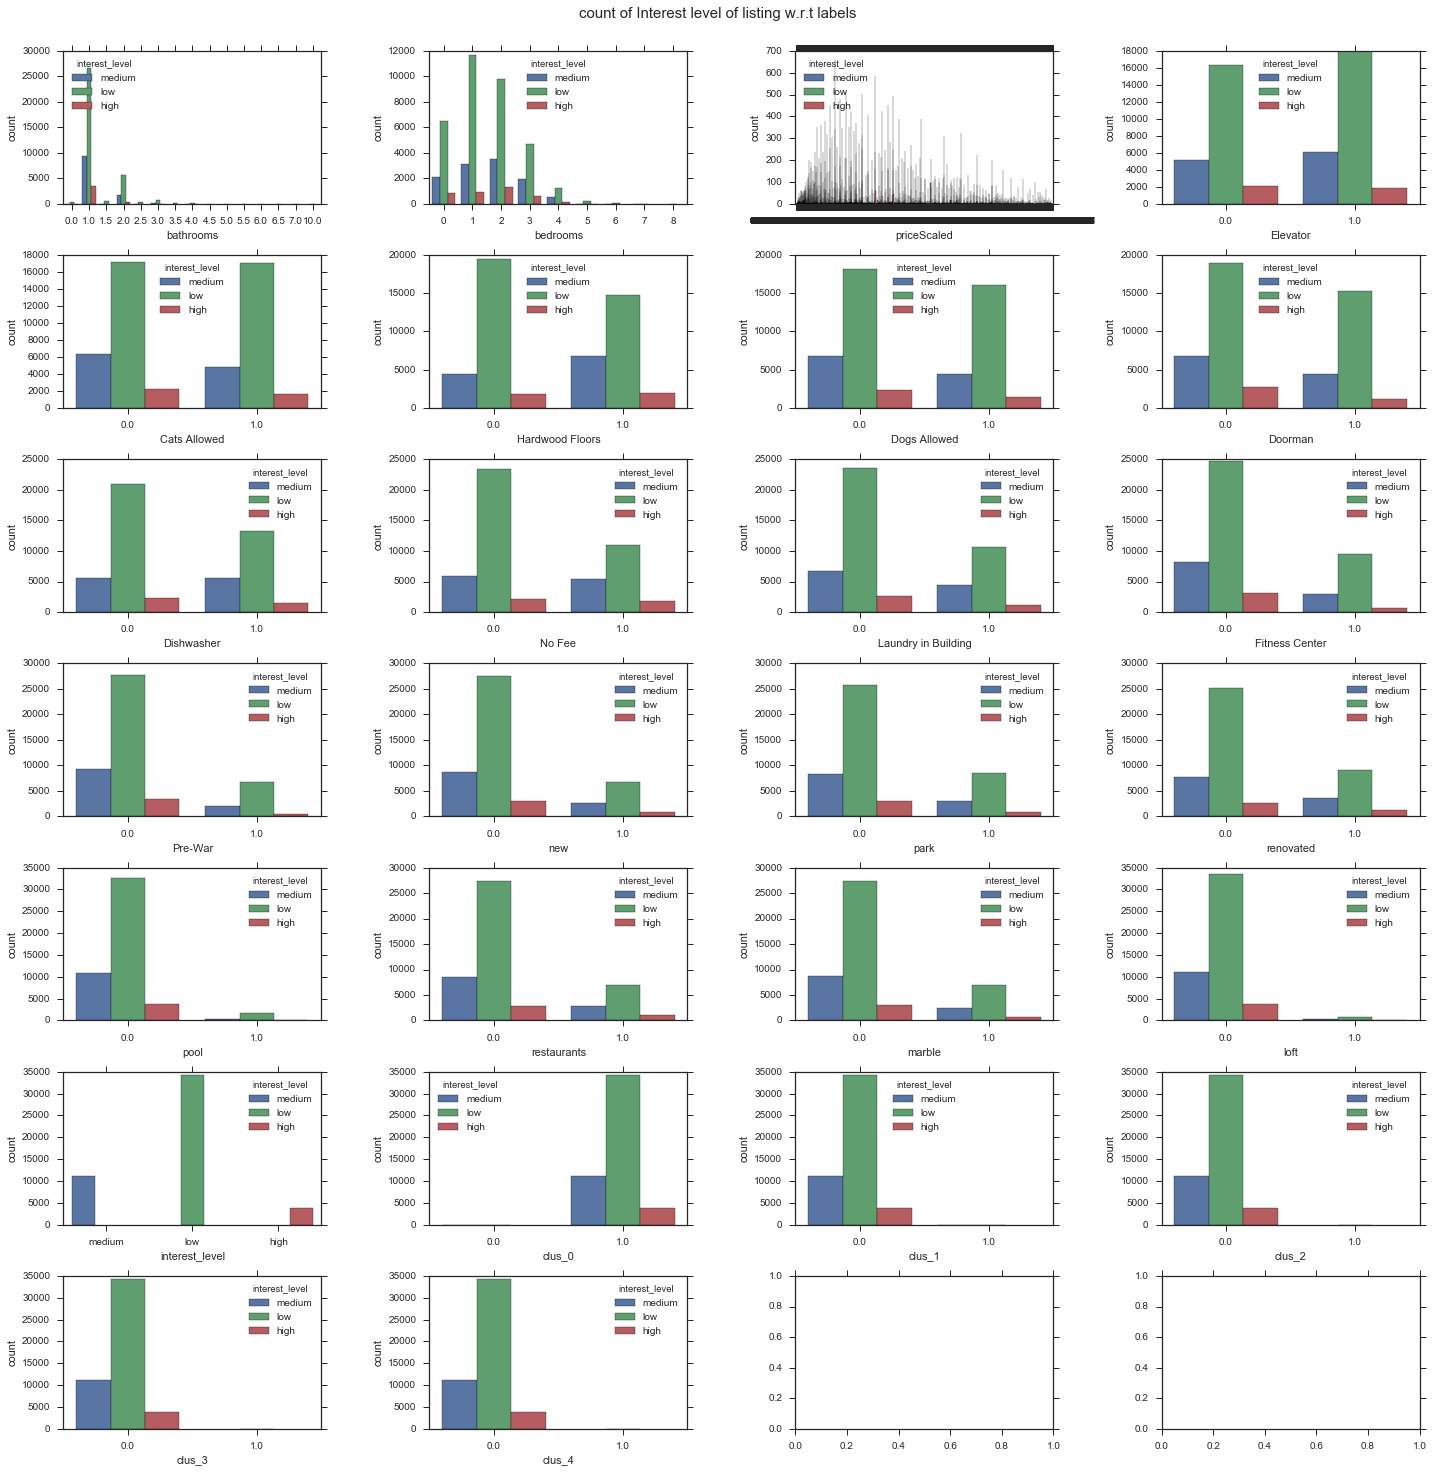

In [38]:
import seaborn as sns
fig, na_ax = plt.subplots(nrows=7,ncols=4,figsize=(20,20))

na_ax = na_ax.ravel()

for col, ax in zip(displayFrame.columns, na_ax):
    sns.countplot(x=col,data=displayFrame, hue='interest_level', ax=ax);
fig.suptitle('count of Interest level of listing w.r.t labels', fontsize=15, y=1.02)
fig.tight_layout();

In [39]:
displayFrame.columns

Index([          u'bathrooms',            u'bedrooms',         u'priceScaled',
                  u'Elevator',        u'Cats Allowed',     u'Hardwood Floors',
              u'Dogs Allowed',             u'Doorman',          u'Dishwasher',
                    u'No Fee', u'Laundry in Building',      u'Fitness Center',
                   u'Pre-War',                 u'new',                u'park',
                 u'renovated',                u'pool',         u'restaurants',
                    u'marble',                u'loft',      u'interest_level',
                    u'clus_0',              u'clus_1',              u'clus_2',
                    u'clus_3',              u'clus_4'],
      dtype='object')

#### The fallowing visualizations helps us to understand how many users of particular interest level are using the features

In [40]:
testFrameX=displayFrame[['Elevator','Cats Allowed','Hardwood Floors','Dogs Allowed','Doorman','Dishwasher','No Fee','Laundry in Building','Fitness Center','Pre-War','new','park','renovated','pool','restaurants','marble','loft']]

In [41]:
mediumUsers=[]
lowUsers=[]
highUsers=[]
for y in testFrameX:
    mediumUsers.append(displayFrame.loc[displayFrame.interest_level=='medium',y].sum())
    lowUsers.append(displayFrame.loc[displayFrame.interest_level=='low',y].sum())
    highUsers.append(displayFrame.loc[displayFrame.interest_level=='high',y].sum())


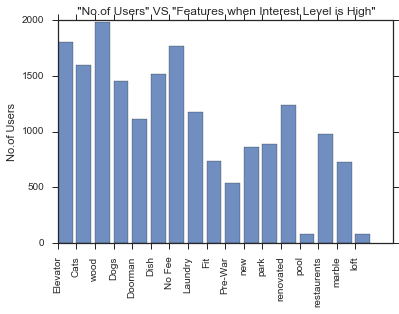

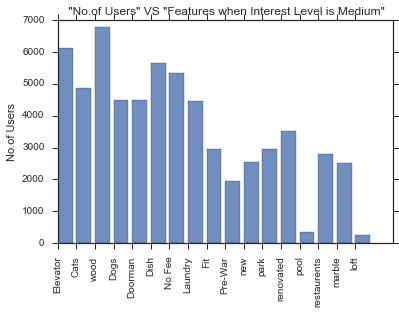

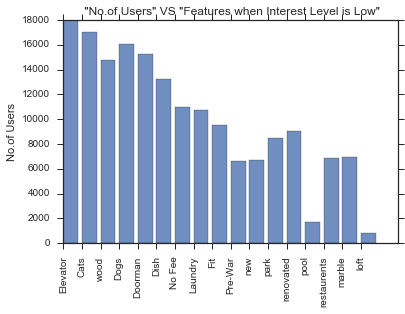

In [44]:
features = ('Elevator','Cats','wood','Dogs','Doorman','Dish','No Fee','Laundry','Fit','Pre-War','new','park','renovated','pool','restaurents','marble','loft')
y_pos = np.arange(len(features))

megax={'Medium':mediumUsers,'Low':lowUsers,'High':highUsers}
for k,v in megax.iteritems(): 
    plt.bar(y_pos, v, alpha=0.8)
    plt.xticks(y_pos, features,rotation='vertical')
    plt.ylabel('No.of Users')
    plt.title(' "No.of Users" VS "Features when Interest Level is '+k+'"')
    plt.show()


### Convert the labeled Y column (target column) into numerical

In [45]:
interestFrame=resFrame['interest_level']
yList=[]
for col,col_data in interestFrame.iteritems():
    if col_data=='low':
        yList.append(0)
    elif col_data=='medium':
        yList.append(1)
    elif col_data=='high':
        yList.append(2)
YFrame=pd.DataFrame(yList,columns=['interest_level'])
YFrame.head()

,interest_level
0,1
1,0
2,2
3,0
4,0


In [46]:
XTrain=displayFrame[['bathrooms','bedrooms','priceScaled','Elevator','Cats Allowed','Hardwood Floors','Dogs Allowed','Doorman','Dishwasher','No Fee','Laundry in Building','Fitness Center','Pre-War','new','park','renovated','pool','restaurants','marble','loft','clus_0','clus_1','clus_2','clus_3','clus_4']]
XTrain.head()

,bathrooms,bedrooms,priceScaled,Elevator,Cats Allowed,Hardwood Floors,Dogs Allowed,Doorman,Dishwasher,No Fee,...,renovated,pool,restaurants,marble,loft,clus_0,clus_1,clus_2,clus_3,clus_4
0,1.5,3,0.000603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,2,0.001098,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1,0.000573,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1,0.000658,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,4,0.000673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn import svm

In [48]:
from sklearn.cross_validation import train_test_split

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(XTrain, YFrame, test_size=0.25, random_state=0)

### From the data we can imply that we need to use multi label classification algorithm. so first take a regular classification algorithm and use it in multi lable classification algorithm.
#### Here we can use ensemble classifier than using the regular classification algorithm, as I tried several algos and found AdaBoost yields better results

In [116]:
forest = AdaBoostClassifier(n_estimators=100, random_state=0,learning_rate=1)
multi_target_forest = OneVsRestClassifier(forest, n_jobs=-1)
clf=multi_target_forest.fit(X_train,y_train)
op=clf.predict(X_test)

In [117]:
f1_score(y_test,op,average='micro')


0.71000162100826714

####  Trying various values for these paramters yields poor results than 0.71 F1 score

In [123]:
forest = AdaBoostClassifier(n_estimators=100, random_state=0,learning_rate=2)
multi_target_forest = OneVsRestClassifier(forest, n_jobs=-1)
clf=multi_target_forest.fit(X_train,y_train)
op=clf.predict(X_test)
f1_score(y_test,op,average='micro')

0.46117685200194519

In [124]:
forest = AdaBoostClassifier(n_estimators=50, random_state=0,learning_rate=2)
multi_target_forest = OneVsRestClassifier(forest, n_jobs=-1)
clf=multi_target_forest.fit(X_train,y_train)
op=clf.predict(X_test)
f1_score(y_test,op,average='micro')

0.46117685200194519

In [125]:
forest = AdaBoostClassifier(n_estimators=50, random_state=0,learning_rate=5)
multi_target_forest = OneVsRestClassifier(forest, n_jobs=-1)
clf=multi_target_forest.fit(X_train,y_train)
op=clf.predict(X_test)
f1_score(y_test,op,average='micro')

0.22604960285297454

## Now let's try the Random Forests Classifier

In [120]:
forest = RandomForestClassifier(n_estimators=100,random_state=1,max_depth=80, min_samples_split=30, min_samples_leaf=15)
multi_target_forest = OneVsRestClassifier(forest, n_jobs=-1)
clf=multi_target_forest.fit(X_train,y_train)
op=clf.predict(X_test)

In [119]:
f1_score(y_test,op,average='micro')

0.71470254498297936

In [131]:
forest = RandomForestClassifier(n_estimators=100,random_state=1,max_depth=80, min_samples_split=50, min_samples_leaf=2)
multi_target_forest = OneVsRestClassifier(forest, n_jobs=-1)
clf=multi_target_forest.fit(X_train,y_train)
op=clf.predict(X_test)
f1_score(y_test,op,average='micro')

0.71640460366347869

In [132]:
forest = RandomForestClassifier(n_estimators=50,random_state=1,max_depth=80, min_samples_split=30, min_samples_leaf=1)
multi_target_forest = OneVsRestClassifier(forest, n_jobs=-1)
clf=multi_target_forest.fit(X_train,y_train)
op=clf.predict(X_test)
f1_score(y_test,op,average='micro')

0.71745825903712124

## This is the best score I got after implementing various values for parameters - F1 score 0.7174

In [121]:
forest = DecisionTreeClassifier(random_state=0)
multi_target_forest = OneVsRestClassifier(forest, n_jobs=-1)
clf=multi_target_forest.fit(X_train,y_train)
op=clf.predict(X_test)

In [122]:
f1_score(y_test,op,average='micro')

0.59677419354838712

In [138]:
forest = svm.SVC(random_state=0)
multi_target_forest = OneVsRestClassifier(forest, n_jobs=-1)
clf=forest.fit(X_train,y_train)
op=clf.predict(X_test)

In [139]:
f1_score(y_test,op,average='micro')

0.69768195817798673

### let's make some changes to data sets and check the stability of our model

In [140]:
X_train, X_test, y_train, y_test = train_test_split(XTrain, YFrame, test_size=0.35, random_state=1)

In [141]:
forest = RandomForestClassifier(n_estimators=50,random_state=1,max_depth=80, min_samples_split=30, min_samples_leaf=1)
multi_target_forest = OneVsRestClassifier(forest, n_jobs=-1)
clf=multi_target_forest.fit(X_train,y_train)
op=clf.predict(X_test)
f1_score(y_test,op,average='micro')

0.710142410559222

In [142]:
X_train, X_test, y_train, y_test = train_test_split(XTrain, YFrame, test_size=0.3)
forest = RandomForestClassifier(n_estimators=50,random_state=1,max_depth=80, min_samples_split=30, min_samples_leaf=1)
multi_target_forest = OneVsRestClassifier(forest, n_jobs=-1)
clf=multi_target_forest.fit(X_train,y_train)
op=clf.predict(X_test)
f1_score(y_test,op,average='micro')

0.70917195731460214

In [144]:
X_train, X_test, y_train, y_test = train_test_split(XTrain, YFrame, test_size=0.4,random_state=3)
forest = RandomForestClassifier(n_estimators=50,random_state=1,max_depth=80, min_samples_split=30, min_samples_leaf=1)
multi_target_forest = OneVsRestClassifier(forest, n_jobs=-1)
clf=multi_target_forest.fit(X_train,y_train)
op=clf.predict(X_test)
f1_score(y_test,op,average='micro')

0.7128311635682083

# With the above 3 code snippets, we can conclude that our model is stable as every time it yields similar scores 